CIFAR-10 data loaded.

--- Model Summary (Enhanced for CIFAR-10) ---


C:\Users\WILL2749\AppData\Local\anaconda3new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1_1 (Conv2D)                     │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1_2 (Conv2D)                     │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2_1 (Conv2D)                     │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2_2 (Conv2D)                     │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Dense (Dense)                 │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout3 (Dropout)                   │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Dense (Dense)                 │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

-------------------------------------------

Starting CNN Training on CIFAR-10...
Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.4334 - loss: 1.5534 - val_accuracy: 0.5738 - val_loss: 1.1800
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5971 - loss: 1.1296 - val_accuracy: 0.6458 - val_loss: 0.9926
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.6637 - loss: 0.9606 - val_accuracy: 0.7052 - val_loss: 0.8284
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6944 - loss: 0.8680 - val_accuracy: 0.7211 - val_loss: 0.7974
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7204 - loss: 0.7930 - val_accuracy: 0.7410 - val_loss: 0.7412
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7382 - loss: 0.7437 - val_accuracy: 0.7504 - val_loss: 0.7162
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7551 - loss: 0.6965 - val_accuracy: 0.7557 - val_loss: 0.6995
Epoch 8/

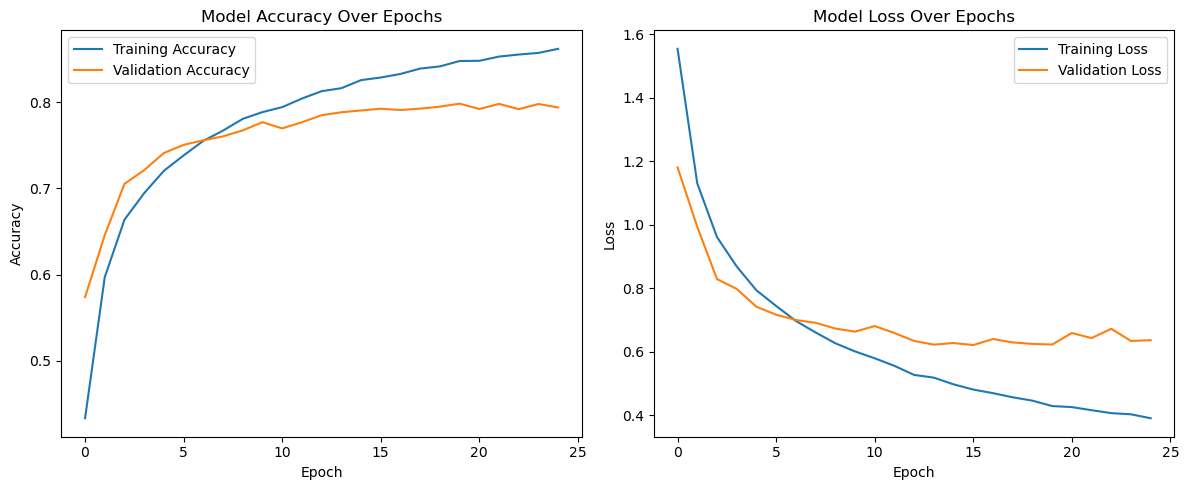

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, \
    Flatten, Dense, Dropout # Added Dropout for better performance

#  1. Data Import and Preprocessing for CIFAR-10

# Load the CIFAR-10 dataset (Contains 50,000 training images and 10,000 test images)
(x_train_raw, labels), (x_test, y_test_raw) = tf.keras.datasets.cifar10.load_data()
print("CIFAR-10 data loaded.")

# Define image parameters for CIFAR-10
image_size = 32
num_channels = 3 

# Normalize pixel data to be between 0 and 1
x_train = x_train_raw.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#  2. Data Reshaping (for CNN) and One-Hot Encoding

num_classes = 10 # CIFAR-10 has 10 classes (airplane, automobile, bird, etc.)

# Convert integer labels to one-hot encoded vectors 
y_train = tf.keras.utils.to_categorical(labels, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=num_classes)

#  3. Build the Enhanced CNN Model 
# The architecture is deepened and widened to handle the complexity of color images.

model = Sequential([
    # Block 1: Increased filters to 32
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, num_channels), name='Conv1_1'),
    Conv2D(32, (3, 3), activation='relu', name='Conv1_2'),
    MaxPooling2D((2, 2), name='Pool1'),
    Dropout(0.25, name='Dropout1'), # Regularization

    # Block 2: Increased filters to 64
    Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2_1'),
    Conv2D(64, (3, 3), activation='relu', name='Conv2_2'),
    MaxPooling2D((2, 2), name='Pool2'),
    Dropout(0.25, name='Dropout2'), # Regularization
    
    # Classification (DNN part)
    Flatten(name='Flatten'),
    # Hidden Dense Layer for more capacity
    Dense(512, activation='relu', name='Hidden_Dense'),
    Dropout(0.5, name='Dropout3'), # Regularization before output

    # Output Layer (10 classes, softmax)
    Dense(num_classes, activation='softmax', name='Output_Dense')
])

#  4. Compile and Train the Model

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
print("\n--- Model Summary (Enhanced for CIFAR-10) ---")
model.summary()
print("-------------------------------------------\n")

# Train the model 
print("Starting CNN Training on CIFAR-10...")
history = model.fit(
    x_train, y_train,
    epochs=25,       # Increased epochs for better learning on a complex dataset
    batch_size=64,   # Adjusted batch size
    validation_data=(x_test, y_test) # Use the dedicated test set for validation
)

print("\nCNN Training Complete.")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

#  5. Plot Training History
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()